               precision    recall  f1-score   support

       Africa       0.00      0.00      0.00        13
         Asia       0.25      0.25      0.25       102
    Australia       0.07      0.22      0.11         9
       Europe       0.65      0.48      0.56       477
North America       0.75      0.78      0.77       741
South America       0.15      0.41      0.22        32

     accuracy                           0.62      1374
    macro avg       0.31      0.36      0.32      1374
 weighted avg       0.66      0.62      0.63      1374



array([0.54803493, 0.59170306, 0.61202186, 0.61748634, 0.61748634])

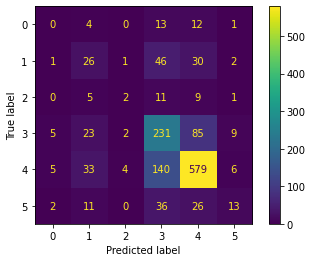

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score


df = pd.read_csv("Final_Final_Matrix.csv",  encoding="ISO-8859-1")
X = df.iloc[:, 7:14] # Independent Variables
y = df.iloc[:,6] # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=206)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000,random_state=206)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

model = KNeighborsClassifier()
# fit the model to the training data
model.fit(X_train, y_train)

model.predict(X_test)

np.mean(model.predict(X_test) == y_test) 

model.score(X_test, y_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix,
                     index = ['Africa', 'Asia','Australia', 'Europe', 'North America', 'South America'],
                     columns = ['Africa', 'Asia','Australia', 'Europe', 'North America', 'South America'])
cnf_matrix

ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(model.predict(X_test), y_test))



In [39]:
model2 = KNeighborsClassifier()
scores = cross_val_score(model2, X, y, cv = 30)
scores

print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")



Accuracy: 0.6035202385047588 (+/- 0.04470244835493288)


In [59]:
from sklearn.svm import SVR
# create an estimator of a SVR model
model_svr = SVR()
# fit the model to the data
model_svr.fit(X, y)
print(model_svr.score(X, y))

0.0997503404665031
